# Notebook for Silver Linings book

## 1. Chapter: Mortality, productivity, and fertility in the U.S.

In [1]:
# Import packages
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ogcore.demographics as demog
import ogcore.parameter_plots as pp

### 1.1. Create births, deaths, and productivity charts

#### 1.1.1. Total US births and deaths: 1950-2100

In [2]:
# Read in birth and death data. Historical US births and deaths historical data
# and forecasts come from Our World in Data, "Births and deaths per year,
# United States: historic estimates with future projectsion based on the UN
# medium scenario",
# https://ourworldindata.org/grapher/births-and-deaths-projected-to-2100?country=~USA
# and "Birth rate vs. death rate, 2023",
# https://ourworldindata.org/grapher/birth-rate-vs-death-rate?country=~USA. The
# original source data come from "World Population Prospects", United Nations,
# https://population.un.org/wpp/.
birth_death_df = pd.read_csv(
    './data/owd_births_deaths.csv', header=9,
    dtype={
        'year':np.int32, 'births_per_1k_hst': np.float64,
        'births_per_1k_frc': np.float64, 'deaths_per_1k_hst': np.float64,
        'deaths_per_1k_frc': np.float64, 'tot_pop':np.float64,
        'tot_deaths_hst': np.float64, 'tot_deaths_frc': np.float64,
        'tot_births_hst': np.float64, 'tot_births_frc': np.float64,
    }
)
birth_death_df

,year,births_per_1k_hst,births_per_1k_frc,deaths_per_1k_hst,deaths_per_1k_frc,tot_pop,tot_deaths_hst,tot_deaths_frc,tot_births_hst,tot_births_frc
0,1950,23.981,NaN,9.596,NaN,154202683.0,1479684.0,NaN,3697926.0,NaN
1,1951,24.352,NaN,9.603,NaN,156481322.0,1502719.0,NaN,3810644.0,NaN
2,1952,24.561,NaN,9.509,NaN,158794225.0,1509927.0,NaN,3900093.0,NaN
3,1953,24.539,NaN,9.436,NaN,161168319.0,1520815.1,NaN,3954926.0,NaN
4,1954,24.870,NaN,9.027,NaN,163636304.0,1477219.0,NaN,4069617.0,NaN
...,...,...,...,...,...,...,...,...,...,...
146,2096,NaN,8.588315,NaN,11.90473,NaN,NaN,4513263.0,NaN,3891035.0
147,2097,NaN,8.578221,NaN,11.90798,NaN,NaN,4535969.0,NaN,3902765.0
148,2098,NaN,8.570960,NaN,11.90866,NaN,NaN,4558804.0,NaN,3905290.0
149,2099,NaN,8.561096,NaN,11.90681,NaN,NaN,4582590.0,NaN,3913639.0


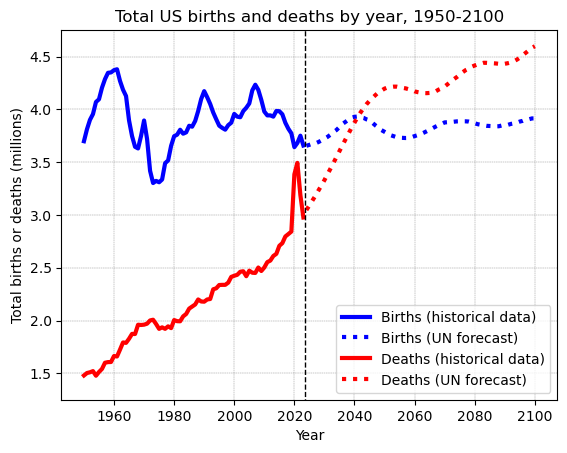

In [3]:
birth_death_tot_hst_df = birth_death_df[
    ['year', 'tot_births_hst', 'tot_deaths_hst']
][birth_death_df['year'] <= 2023]
years_hst = birth_death_tot_hst_df['year'].to_numpy()
tot_births_hst = birth_death_tot_hst_df['tot_births_hst'].to_numpy() / 1e6
tot_deaths_hst = birth_death_tot_hst_df['tot_deaths_hst'].to_numpy() / 1e6

birth_death_tot_frc_df = birth_death_df[
    ['year', 'tot_births_frc', 'tot_deaths_frc']
][birth_death_df['year'] > 2023]
years_frc = birth_death_tot_frc_df['year'].to_numpy()
tot_births_frc = birth_death_tot_frc_df['tot_births_frc'].to_numpy() / 1e6
tot_deaths_frc = birth_death_tot_frc_df['tot_deaths_frc'].to_numpy() / 1e6

fig1, ax1 = plt.subplots()
ax1.plot(
    years_hst, tot_births_hst, linestyle='-', color='blue', linewidth=3,
    label='Births (historical data)'
)
ax1.plot(
    years_frc, tot_births_frc, linestyle=':', color='blue', linewidth=3,
    label='Births (UN forecast)'
)
ax1.plot(
    years_hst, tot_deaths_hst, linestyle='-', color='red', linewidth=3,
    label='Deaths (historical data)'
)
ax1.plot(
    years_frc, tot_deaths_frc, linestyle=':', color='red', linewidth=3,
    label='Deaths (UN forecast)'
)
ax1.vlines(
    x=2023.5, ymin=1.0, ymax=5.0, color='black', linestyle='--', linewidth=1
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
plt.ylim(1.25, 4.75)
plt.xlabel("Year")
plt.ylabel("Total births or deaths (millions)")
plt.legend()
plt.title("Total US births and deaths by year, 1950-2100")
plt.savefig('./images/us_birth_death_tot.png')
plt.show()

#### 1.1.2a. US birth rates and death rates: 1950-2100

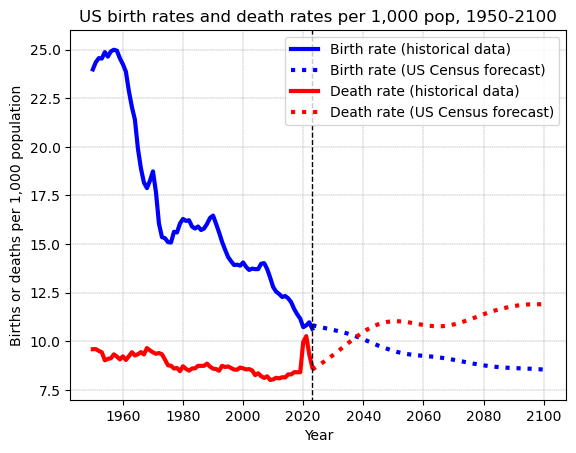

In [4]:
birth_death_rate_hst_df = birth_death_df[
    ['year', 'births_per_1k_hst', 'deaths_per_1k_hst']
][birth_death_df['year'] <= 2023]
years_hst = birth_death_rate_hst_df['year'].to_numpy()
birth_rates_hst = birth_death_rate_hst_df['births_per_1k_hst'].to_numpy()
death_rates_hst = birth_death_rate_hst_df['deaths_per_1k_hst'].to_numpy()

birth_death_rate_frc_df = birth_death_df[
    ['year', 'births_per_1k_frc', 'deaths_per_1k_frc']
][birth_death_df['year'] >= 2023]
years_frc = birth_death_rate_frc_df['year'].to_numpy()
birth_death_rate_frc_df
birth_rates_frc = birth_death_rate_frc_df['births_per_1k_frc'].to_numpy()
death_rates_frc = birth_death_rate_frc_df['deaths_per_1k_frc'].to_numpy()

fig2, ax2 = plt.subplots()
ax2.plot(
    years_hst, birth_rates_hst, linestyle='-', color='blue', linewidth=3,
    label='Birth rate (historical data)'
)
ax2.plot(
    years_frc, birth_rates_frc, linestyle=':', color='blue', linewidth=3,
    label='Birth rate (US Census forecast)'
)
ax2.plot(
    years_hst, death_rates_hst, linestyle='-', color='red', linewidth=3,
    label='Death rate (historical data)'
)
ax2.plot(
    years_frc, death_rates_frc, linestyle=':', color='red', linewidth=3,
    label='Death rate (US Census forecast)'
)
ax2.vlines(
    x=2023, ymin=5, ymax=30, color='black', linestyle='--', linewidth=1
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
plt.ylim(7.0, 26.0)
plt.xlabel("Year")
plt.ylabel("Births or deaths per 1,000 population")
plt.legend()
plt.title("US birth rates and death rates per 1,000 pop, 1950-2100")
plt.savefig('./images/us_birth_death_rate.png')
plt.show()

#### 1.1.2b. US birth rates and death rates: 1950-2023

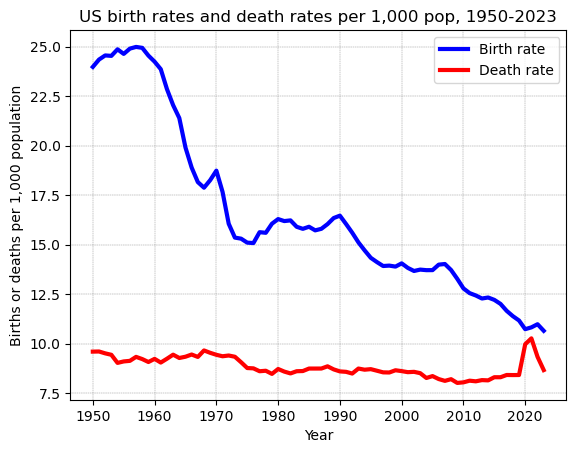

In [5]:
fig2b, ax2b = plt.subplots()
ax2b.plot(
    years_hst, birth_rates_hst, linestyle='-', color='blue', linewidth=3,
    label='Birth rate'
)
ax2b.plot(
    years_hst, death_rates_hst, linestyle='-', color='red', linewidth=3,
    label='Death rate'
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
# plt.ylim(7.0, 26.0)
plt.xlabel("Year")
plt.ylabel("Births or deaths per 1,000 population")
plt.legend()
plt.title("US birth rates and death rates per 1,000 pop, 1950-2023")
plt.savefig('./images/us_birth_death_rate2023.png')
plt.show()

#### 1.1.3. US productivity growth rates

In [6]:
# Read in birth and death data. Historical measures of total factor
# productivity annual growth rates from the private nonfarm business sector
# from 1988 to 2023 come from FRED "Private Nonfarm Business Sector: Total
# Factor Productivity (MPU4910013)",
# https://fred.stlouisfed.org/series/MPU4910013. Historical measures of labor
# productivity annual growth rates from the private nonfarm business sector
# from 1988 to 2023 come from FRED "Private Nonfarm Business Sector: Labor
# Productivity (MPU4910063)", https://fred.stlouisfed.org/series/MPU4910063

prod_df = pd.read_csv(
    './data/us_productivity.csv', header=8,
    dtype={
        'year':np.int32, 'tfp_cnst_price_index': np.float64,
        'tfp_cnst_price_pctchg': np.float64,
		'tfp_prv_nf_bus_pctchg': np.float64,
        'tfp_prv_nf_bus_index': np.float64,
		'labprod_prv_nf_bus_pctchg':np.float64,
        'labprod_prv_nf_bus_index': np.float64
    }
)
prod_df

,year,tfp_cnst_price_index,tfp_cnst_price_pctchg,tfp_prv_nf_bus_pctchg,tfp_prv_nf_bus_index,labprod_prv_nf_bus_pctchg,labprod_prv_nf_bus_index
0,1954,0.651450,NaN,NaN,NaN,NaN,NaN
1,1955,0.672531,3.235934,NaN,NaN,NaN,NaN
2,1956,0.668704,-0.568926,NaN,NaN,NaN,NaN
3,1957,0.675979,1.087798,NaN,NaN,NaN,NaN
4,1958,0.677200,0.180654,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
65,2019,1.016796,0.856037,1.3,1.283579,2.5,1.855847
66,2020,NaN,NaN,-0.2,1.281012,5.9,1.965342
67,2021,NaN,NaN,3.2,1.322005,1.3,1.990892
68,2022,NaN,NaN,-1.6,1.300852,-2.1,1.949083


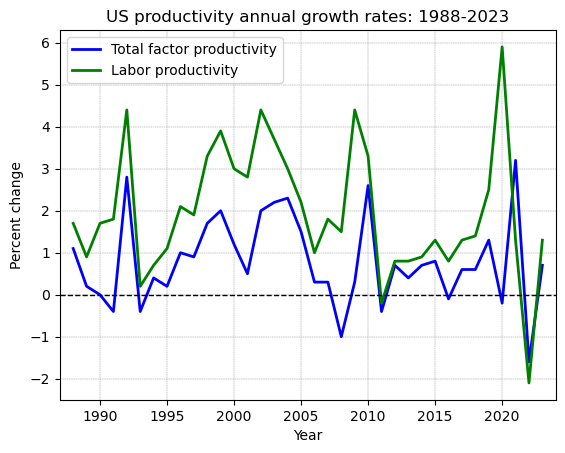

In [7]:
prod_prv_nf_bus_df = prod_df[
    [
        'year', 'tfp_prv_nf_bus_pctchg', 'tfp_prv_nf_bus_index',
        'labprod_prv_nf_bus_pctchg', 'labprod_prv_nf_bus_index'
    ]
][prod_df['year'] >= 1988]
years = prod_prv_nf_bus_df['year'].to_numpy()
tfp_pctchg = prod_prv_nf_bus_df['tfp_prv_nf_bus_pctchg'].to_numpy()
labprod_pctchg = prod_prv_nf_bus_df['labprod_prv_nf_bus_pctchg'].to_numpy()

fig3, ax3= plt.subplots()
ax3.plot(
    years, tfp_pctchg, linestyle='-', color='blue', linewidth=2,
    label='Total factor productivity'
)
ax3.plot(
    years, labprod_pctchg, linestyle='-', color='green', linewidth=2,
    label='Labor productivity'
)
ax3.hlines(
    y=0.0, xmin=1987, xmax=2024, color='black', linestyle='--', linewidth=1
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
plt.xlim(1987, 2024)
plt.xlabel("Year")
plt.ylabel("Percent change")
plt.legend()
plt.title("US productivity annual growth rates: 1988-2023")
plt.savefig('./images/us_productivity_pctchg.png')
plt.show()

In [8]:
tfp_pctchg_mean2006_2023 = np.mean(
    prod_prv_nf_bus_df['tfp_prv_nf_bus_pctchg'][
        prod_prv_nf_bus_df['year'] >= 2006
    ].to_numpy()
)
labprod_pctchg_mean2006_2023 = np.mean(
    prod_prv_nf_bus_df['labprod_prv_nf_bus_pctchg'][
        prod_prv_nf_bus_df['year'] >= 2006
    ].to_numpy()
)
tfp_pctchg_mean1988_2005 = np.mean(
    prod_prv_nf_bus_df['tfp_prv_nf_bus_pctchg'][
        prod_prv_nf_bus_df['year'] < 2006
    ].to_numpy()
)
labprod_pctchg_mean1988_2005 = np.mean(
    prod_prv_nf_bus_df['labprod_prv_nf_bus_pctchg'][
        prod_prv_nf_bus_df['year'] < 2006
    ].to_numpy()
)
tfp_pctchg_mean1988_2023 = np.mean(tfp_pctchg)
labprod_pctchg_mean1988_2023 = np.mean(labprod_pctchg)
print(
    "Average labor productivity annual growth rate, " +
    "1988-2005: {:.2f}%".format(labprod_pctchg_mean1988_2005)
)
print("Average TFP annual growth rate, 1988-2005: {:.2f}%".format(
    tfp_pctchg_mean1988_2005
))
print(
    "Average labor productivity annual growth rate, " +
    "2006-2023: {:.2f}%".format(labprod_pctchg_mean2006_2023)
)
print("Average TFP annual growth rate, 2006-2023: {:.2f}%".format(
    tfp_pctchg_mean2006_2023
))
print(
    "Average labor productivity annual growth rate, " +
    "1988-2023: {:.2f}%".format(labprod_pctchg_mean1988_2023)
)
print("Average TFP annual growth rate, 1988-2023: {:.2f}%".format(
    tfp_pctchg_mean1988_2023
))

Average labor productivity annual growth rate, 1988-2005: 2.38%
Average TFP annual growth rate, 1988-2005: 1.07%
Average labor productivity annual growth rate, 2006-2023: 1.56%
Average TFP annual growth rate, 2006-2023: 0.51%
Average labor productivity annual growth rate, 1988-2023: 1.97%
Average TFP annual growth rate, 1988-2023: 0.79%


#### 1.1.4. US productivity index
I think this index is incorrect. I think you need to price adjust it, which the constant prices indices data through 2019 do.

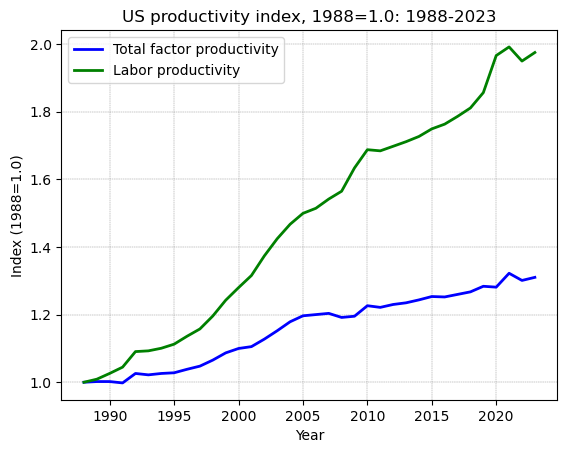

In [9]:
tfp_index = prod_prv_nf_bus_df['tfp_prv_nf_bus_index'].to_numpy()
labprod_index = prod_prv_nf_bus_df['labprod_prv_nf_bus_index'].to_numpy()

fig4, ax4= plt.subplots()
ax4.plot(
    years, tfp_index, linestyle='-', color='blue', linewidth=2,
    label='Total factor productivity'
)
ax4.plot(
    years, labprod_index, linestyle='-', color='green', linewidth=2,
    label='Labor productivity'
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
# plt.xlim(1987, 2024)
plt.xlabel("Year")
plt.ylabel("Index (1988=1.0)")
plt.legend()
plt.title("US productivity index, 1988=1.0: 1988-2023")
plt.savefig('./images/us_productivity_index.png')
plt.show()

## 2. Chapter 1. Measuring Biological Aging

### 2.1. Create plots of effects of 1gen, 2gen drug effect on population over time: 2025-2050 (26 years)

In [10]:
years = np.arange(2025, 2051)
T = len(years)
# Read in baseline population time path from model output
(
    fert_rates_base_TP,
    mort_rates_base_TP,
    infmort_rates_base_TP,
    imm_rates_base_TP,
    pop_dist_base_TP,
    pre_pop_dist_base
) = pickle.load(
    open('./data/og_simulations/baseline/demog_vars_baseline.pkl', 'rb')
)
tot_pop_2025 = pop_dist_base_TP[0, :].sum()

tot_pop_2025_2050_base = np.zeros(T)
tot_pop_2025_2050_base[0] = tot_pop_2025

tot_pop_2025_2050_1gen = np.zeros(T)
tot_pop_2025_2050_1gen[0] = tot_pop_2025

tot_pop_2025_2050_2gen = np.zeros(T)
tot_pop_2025_2050_2gen[0] = tot_pop_2025

p_base = pickle.load(
    open('./data/og_simulations/baseline/model_params.pkl', 'rb')
)
g_n_vec_base = p_base.g_n
p_1gen = pickle.load(
    open('./data/og_simulations/section1_1gen/model_params.pkl', 'rb')
)
g_n_vec_1gen = p_1gen.g_n
p_2gen = pickle.load(
    open('./data/og_simulations/section1_2gen/model_params.pkl', 'rb')
)
g_n_vec_2gen = p_2gen.g_n
for t in range(1, T):
    tot_pop_2025_2050_base[t] = (
        (1 + g_n_vec_base[t - 1]) * tot_pop_2025_2050_base[t - 1]
    )
    tot_pop_2025_2050_1gen[t] = (
        (1 + g_n_vec_1gen[t - 1]) * tot_pop_2025_2050_1gen[t - 1]
    )
    tot_pop_2025_2050_2gen[t] = (
        (1 + g_n_vec_2gen[t - 1]) * tot_pop_2025_2050_2gen[t - 1]
    )

# Put time series in millions of people
tot_pop_2025_2050_base = tot_pop_2025_2050_base / 1e6
tot_pop_2025_2050_1gen = tot_pop_2025_2050_1gen / 1e6
tot_pop_2025_2050_2gen = tot_pop_2025_2050_2gen / 1e6

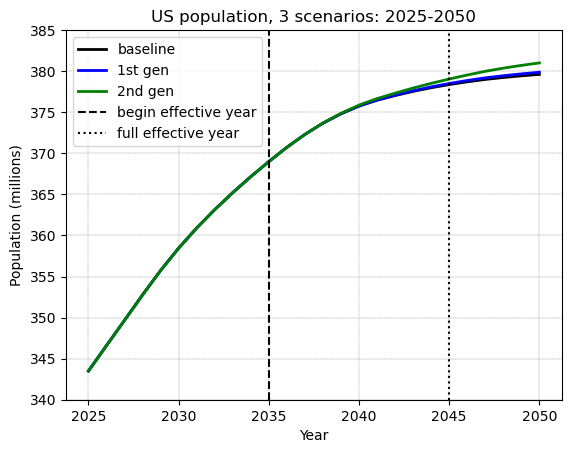

In [11]:
# Plot the population difference between the baseline total population and the
# 1st gen reform
fig5, ax5= plt.subplots()
ax5.plot(
    years, tot_pop_2025_2050_base, linestyle='-', color='black', linewidth=2,
    label='baseline'
)
ax5.plot(
    years, tot_pop_2025_2050_1gen, linestyle='-', color='blue', linewidth=2,
    label='1st gen'
)
ax5.plot(
    years, tot_pop_2025_2050_2gen, linestyle='-', color='green', linewidth=2,
    label='2nd gen'
)
ax5.vlines(
    x=2035, ymin=340, ymax=385, color='black', linestyle='--',
    label="begin effective year"
)
ax5.vlines(
    x=2045, ymin=340, ymax=385, color='black', linestyle=':',
    label="full effective year"
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
plt.ylim(340, 385)
plt.xlabel("Year")
plt.ylabel("Population (millions)")
plt.legend()
plt.title("US population, 3 scenarios: 2025-2050")
plt.savefig('./images/us_pop_1st2ndgen.png')
plt.show()

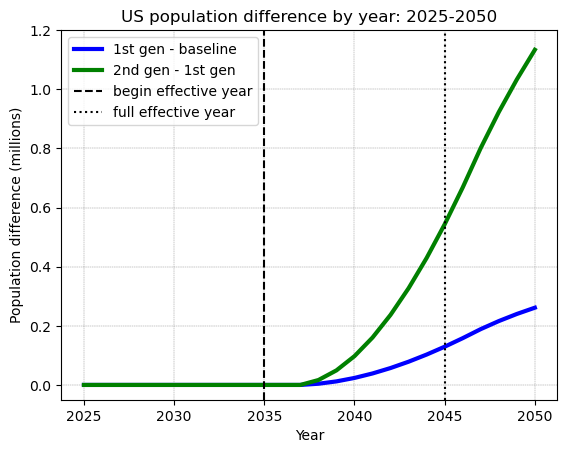

In [12]:
# Plot the population difference between the baseline total population and the
# 1st gen reform and between the 2nd gen and 1st gen reform
fig6, ax6= plt.subplots()
ax6.plot(
    years, tot_pop_2025_2050_1gen - tot_pop_2025_2050_base, linestyle='-',
    color='blue', linewidth=3, label='1st gen - baseline'
)
ax6.plot(
    years, tot_pop_2025_2050_2gen - tot_pop_2025_2050_1gen, linestyle='-',
    color='green', linewidth=3, label='2nd gen - 1st gen'
)
ax6.vlines(
    x=2035, ymin=-0.05, ymax=1.2, color='black', linestyle='--',
    label="begin effective year"
)
ax6.vlines(
    x=2045, ymin=-0.05, ymax=1.2, color='black', linestyle=':',
    label="full effective year"
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
plt.ylim(-0.05, 1.2)
plt.xlabel("Year")
plt.ylabel("Population difference (millions)")
plt.legend()
plt.title("US population difference by year: 2025-2050")
plt.savefig('./images/us_popdiff_2nd1stgen.png')
plt.show()

In [17]:

diff_2gen_1gen = tot_pop_2025_2050_2gen - tot_pop_2025_2050_1gen
diff_2gen_base = tot_pop_2025_2050_2gen - tot_pop_2025_2050_base
print(diff_2gen_1gen)
print(diff_2gen_base)
print(np.arange(2025, 2051))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01661635 0.04929677 0.09743509 0.16030092 0.2371028
 0.32710615 0.42943891 0.54327635 0.66780858 0.8014565  0.92279215
 1.0330179  1.13346927]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02067461 0.06130943 0.12111123 0.19912411 0.29431062
 0.40570286 0.53215919 0.67260277 0.82598085 0.99026442 1.13874896
 1.27299721 1.39473523]
[2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038
 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050]


## 3. Chapter 5. 41 is the new 40

### 3.1. Create plots of effects of 1-year improvement effect on population over time: 2025-2100 (76 years)

In [18]:
years = np.arange(2025, 2101)
T = len(years)

tot_pop_2025_2100_base = np.zeros(T)
tot_pop_2025_2100_base[0] = tot_pop_2025

tot_pop_2025_2100_1yr_all = np.zeros(T)
tot_pop_2025_2100_1yr_all[0] = tot_pop_2025

p_base = pickle.load(
    open('./data/og_simulations/baseline/model_params.pkl', 'rb')
)
g_n_vec_base = p_base.g_n
p_1yr_all = pickle.load(
    open('./data/og_simulations/section5_all/model_params.pkl', 'rb')
)
g_n_vec_1yr_all = p_1yr_all.g_n
for t in range(1, T):
    tot_pop_2025_2100_base[t] = (
        (1 + g_n_vec_base[t - 1]) * tot_pop_2025_2100_base[t - 1]
    )
    tot_pop_2025_2100_1yr_all[t] = (
        (1 + g_n_vec_1yr_all[t - 1]) * tot_pop_2025_2100_1yr_all[t - 1]
    )

# Put time series in millions of people
tot_pop_2025_2100_base = tot_pop_2025_2100_base / 1e6
tot_pop_2025_2100_1yr_all = tot_pop_2025_2100_1yr_all / 1e6

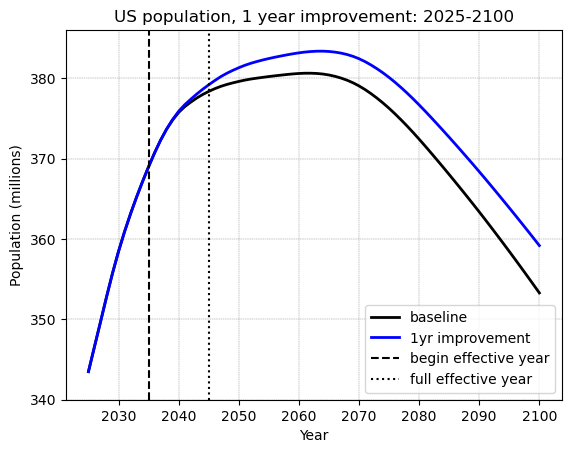

In [20]:
# Plot the population difference between the baseline total population and the
# 1 year improvement reform
fig7, ax7= plt.subplots()
ax7.plot(
    years, tot_pop_2025_2100_base, linestyle='-', color='black', linewidth=2,
    label='baseline'
)
ax7.plot(
    years, tot_pop_2025_2100_1yr_all, linestyle='-', color='blue', linewidth=2,
    label='1yr improvement'
)
ax7.vlines(
    x=2035, ymin=340, ymax=386, color='black', linestyle='--',
    label="begin effective year"
)
ax7.vlines(
    x=2045, ymin=340, ymax=386, color='black', linestyle=':',
    label="full effective year"
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
plt.ylim(340, 386)
plt.xlabel("Year")
plt.ylabel("Population (millions)")
plt.legend()
plt.title("US population, 1 year improvement: 2025-2100")
plt.savefig('./images/us_pop_1yr_all.png')
plt.show()

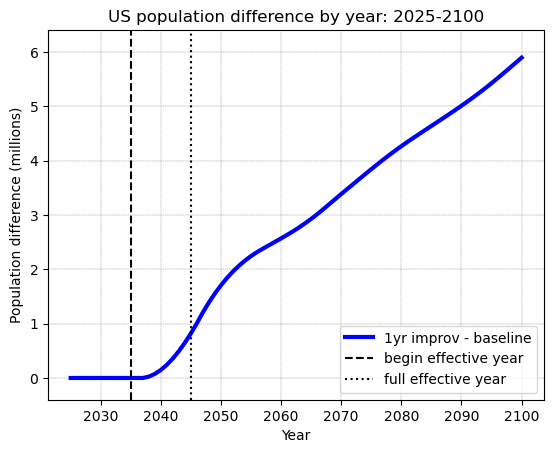

In [28]:
# Plot the population difference between the baseline total population and the
# 1 year improvement (all) reform
fig8, ax8= plt.subplots()
ax8.plot(
    years, tot_pop_2025_2100_1yr_all - tot_pop_2025_2100_base, linestyle='-',
    color='blue', linewidth=3, label='1yr improv - baseline'
)
ax8.vlines(
    x=2035, ymin=-0.4, ymax=6.4, color='black', linestyle='--',
    label="begin effective year"
)
ax8.vlines(
    x=2045, ymin=-0.4, ymax=6.4, color='black', linestyle=':',
    label="full effective year"
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
plt.ylim(-0.4, 6.4)
plt.xlabel("Year")
plt.ylabel("Population difference (millions)")
# Put legend in lower right corner
plt.legend(loc='lower right')
plt.title("US population difference by year: 2025-2100")
plt.savefig('./images/us_popdiff_1yr_all.png')
plt.show()

In [29]:

diff_1yr_all_base = tot_pop_2025_2100_1yr_all - tot_pop_2025_2100_base
print(diff_1yr_all_base)
print(np.arange(2025, 2101))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02521294 0.0747718  0.14771918 0.24290404 0.35907957
 0.49508682 0.64955683 0.82120185 1.00876507 1.209791   1.39161298
 1.55611092 1.70537488 1.84085578 1.96079385 2.06616146 2.16025802
 2.24334459 2.31634821 2.38082209 2.44371416 2.50605317 2.56863259
 2.63269967 2.69963805 2.77089925 2.84671904 2.92683172 3.01216582
 3.10397121 3.19721944 3.29108812 3.38450145 3.4766881  3.56795319
 3.65948724 3.75121984 3.84182053 3.93061217 4.0176799  4.10281428
 4.18549975 4.26534758 4.34245794 4.41747054 4.4913075  4.56458579
 4.63749452 4.71019652 4.78317077 4.85715166 4.93247016 5.00909804
 5.08714734 5.16711811 5.249656   5.33515442 5.42354773 5.5144908
 5.60753286 5.70210912 5.79755391 5.89320853]
[2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038
 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052
 2053 2054 2055 2056 2057

In [30]:
discount_rate = 0.04
discount_rate_vec = np.zeros_like(diff_1yr_all_base)
for t in range(len(discount_rate_vec)):
    discount_rate_vec[t] = (
        (1 + discount_rate) ** t
    )
print(discount_rate_vec)

[ 1.          1.04        1.0816      1.124864    1.16985856  1.2166529
  1.26531902  1.31593178  1.36856905  1.42331181  1.48024428  1.53945406
  1.60103222  1.66507351  1.73167645  1.80094351  1.87298125  1.9479005
  2.02581652  2.10684918  2.19112314  2.27876807  2.36991879  2.46471554
  2.56330416  2.66583633  2.77246978  2.88336858  2.99870332  3.11865145
  3.24339751  3.37313341  3.50805875  3.6483811   3.79431634  3.94608899
  4.10393255  4.26808986  4.43881345  4.61636599  4.80102063  4.99306145
  5.19278391  5.40049527  5.61651508  5.84117568  6.07482271  6.31781562
  6.57052824  6.83334937  7.10668335  7.39095068  7.68658871  7.99405226
  8.31381435  8.64636692  8.9922216   9.35191046  9.72598688 10.11502635
 10.51962741 10.9404125  11.378029   11.83315016 12.30647617 12.79873522
 13.31068463 13.84311201 14.39683649 14.97270995 15.57161835 16.19448308
 16.84226241 17.5159529  18.21659102 18.94525466]


In [36]:
qaly_npv_1yr_all = (
    (diff_1yr_all_base * 1e6 * 100_000) / discount_rate_vec
).sum()
print("QALY NPV of 1yr all reform is ($trillions):", qaly_npv_1yr_all / 1e12)

QALY NPV of 1yr all reform is ($trillions): 3.015718162182453
